## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [35]:
!pip install praw


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1.2 라이브러리 설정

In [37]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [38]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yeonn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeonn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [39]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='Dg2PyiFlkR-LCZb3utPMdA',
    client_secret='viGweePliBv-Feaan4NIFCZNEYIEFQ',
    user_agent='bumbkie'
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [40]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')

2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [41]:
data = {
    'Title': [],
    'Text': [],
}

# 검색된 게시글 제목 및 내용 추가
for post in top_posts:
    data['Title'].append(post.title)            # 제목 
    data['Text'].append(post.selftext)       # 내용 

df = pd.DataFrame(data)
df

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
231,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
232,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
233,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
234,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [42]:
import string


# 불용어 설정
stop_words = set(stopwords.words('english'))

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    # 구두점 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 토큰화
    tokens = text.split()
    # 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# 제목 및 내용 전처리
df['Processed_Title'] = df['Title'].apply(preprocess_text)
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# 전처리 결과 출력
print(df[['Title', 'Processed_Title', 'Text', 'Processed_Text']].head())

                                               Title  \
0       A note to young investors (or new investors)   
1  To all of you who are red this year while the ...   
2  Pelosi's husband buying over $1 million of com...   
3             Beware of what AMC shorts are holding!   
4                      Blackberry -- A Dormant Giant   

                                     Processed_Title  \
0                 note young investors new investors   
1                                  red year sp500 30   
2  pelosis husband buying 1 million computer chip...   
3                          beware amc shorts holding   
4                           blackberry dormant giant   

                                                Text  \
0  As the Fed caused a bit of a ripple in the mar...   
1  Lately I keep hearing the same old narrative f...   
2  [Full Article](https://www.msn.com/en-us/tv/ne...   
3  I understand that most people in this thread i...   
4  ###**Abbreviation Index:**\n\nBB -- Blackbe

In [43]:
df

,Title,Text,Processed_Title,Processed_Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...,note young investors new investors,fed caused bit ripple market today considered ...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...,red year sp500 30,lately keep hearing old narrative beatdown inv...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...,pelosis husband buying 1 million computer chip...,full articlehttpswwwmsncomenustvnewscnnmsnbcab...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...,beware amc shorts holding,understand people thread invest safely arent w...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...,blackberry dormant giant,abbreviation index bb blackberry aws amazon we...
...,...,...,...,...
231,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ...",market recap today thursday november 18 2021,psychomarket recap thursday november 18 2021 s...
232,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...,tsmc sales grow 45 july strong ai chip demand,bloomberg taiwan semiconductor manufacturing c...
233,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...,meta still cheapest magnificent 7 wrong,quick glance numbers meta eps crazy good going...
234,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte...",made 30 since started trading 7 months ago cre...,hello folks 24 year old started working barely...


2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

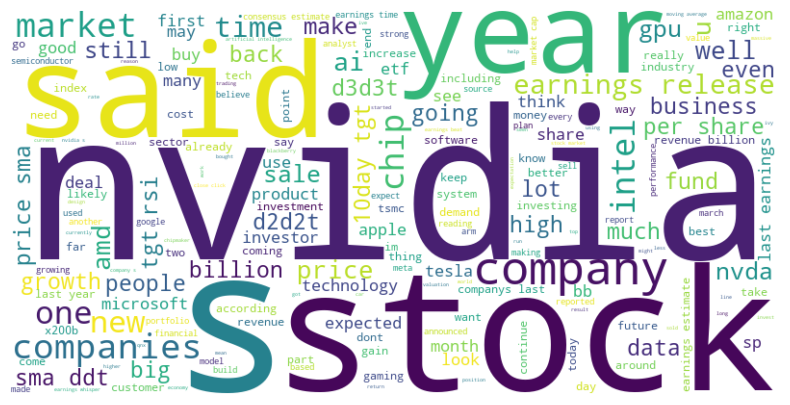

In [45]:
# 전처리된 콘텐츠를 하나의 문자열로 결합
all_words = ' '.join(df['Processed_Text'])

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

C:\Users\yeonn\AppData\Local\Temp\ipykernel_40168\3016333436.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


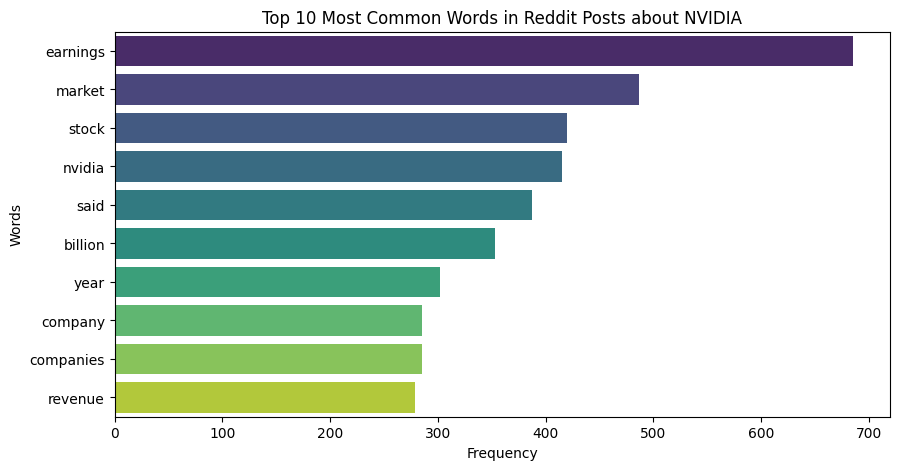

In [53]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'\s+', ' ', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = text.split()  # 토큰화
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]  # 불용어 및 한 글자 제거
    return tokens

# 모든 콘텐츠 전처리
all_tokens = []
for content in df['Text']:
    all_tokens.extend(preprocess_text(content))

# 단어 빈도 계산
word_counts = Counter(all_tokens)

# 가장 많이 나온 단어 10개 추출
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# 바플롯 생성
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words in Reddit Posts about NVIDIA')
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [61]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 사전 학습된 이진 감성 분석 모델과 토크나이저 로드
model_name = "cardiffnlp/twitter-roberta-base-sentiment"  # 적절한 이진 모델 선택
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 감성 분석 함수 정의
def sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    return probabilities.numpy()[0]  # 배열의 첫 번째 요소만 반환

# 데이터프레임에 감성 분석 추가
df['Sentiment'] = df['Processed_Text'].apply(sentiment_analysis)

# 긍정(1) 또는 부정(0)으로 레이블링
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 1 if x[1] > x[0] else 0)

# 레이블을 의미 있는 이름으로 변환
sentiment_map = {0: "Negative", 1: "Positive"}
df['Sentiment_Description'] = df['Sentiment_Label'].map(sentiment_map)

# 결과 확인
print(df[['Title', 'Processed_Text', 'Sentiment_Description']].head())

                                               Title  \
0       A note to young investors (or new investors)   
1  To all of you who are red this year while the ...   
2  Pelosi's husband buying over $1 million of com...   
3             Beware of what AMC shorts are holding!   
4                      Blackberry -- A Dormant Giant   

                                      Processed_Text Sentiment_Description  
0  fed caused bit ripple market today considered ...              Positive  
1  lately keep hearing old narrative beatdown inv...              Positive  
2  full articlehttpswwwmsncomenustvnewscnnmsnbcab...              Positive  
3  understand people thread invest safely arent w...              Positive  
4  abbreviation index bb blackberry aws amazon we...              Positive  


In [62]:
df['Sentiment_Description'].value_counts()

Sentiment_Description
Positive    211
Negative     25
Name: count, dtype: int64

긍정적인 감성이 많은것으로 보아 평가가 대체로 긍정적이다